In [2]:
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

import tensorflow as tf
# Bibliothek für grafische Darstellung laden
import matplotlib.pyplot as plt
from PIL import Image #Image library Pillow
# Funktion für zufällige Bildauswahl laden
from random import randint
import seaborn as sns
import os
import numpy as np
import json 
import pandas as pd

In [3]:
# check if tensorflow is running on gpu
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [4]:
# Datensätze laden
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
labels = ["T-shirt/Top", "Hose", "Pullover", "Kleid", "Mantel", "Sandalen", "Hemd", "Sneaker", "Tasche", "Halbschuhe"]

In [ ]:
#Kennenlernen er Datensätze
print ("trainingsdaten:")
print (len(train_images))
print(train_images[1])
img_no = 1
# Bild zeigen
plt.figure()
print(train_labels[img_no])
plt.imshow(train_images[img_no])
plt.grid(False)
plt.show()

In [7]:
path = "./data/images" 
if not os.path.isdir(path):
    os.makedirs(path)

In [8]:
%%script false --no-raise-error

for i in range(0,100):
    im = Image.fromarray(train_images[i])
    real = train_labels[i]
    im.save(path + "/%d_%d.png" % (i, real))


In [9]:
%%script false --no-raise-error

i = Image.open(path + "/0/1.png")
print(np.array(i))

In [10]:
%%script false --no-raise-error

for i in range(len(train_images)):
    im = Image.fromarray(train_images[i])
    label = train_labels[i]
    if not os.path.isdir(path+ "/%s" % label):
        os.makedirs(path + "/%s" % label)
    im.save(path + "/%s/%d.png" % (label, i))


In [11]:
train_images = train_images.astype("float32") / 255
print(train_images.shape, "train samples")
test_images = test_images.astype("float32") / 255

(60000, 28, 28) train samples


In [12]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
print(train_images.shape)

(60000, 28, 28, 1)


In [13]:
num_classes = 10

# convert class vectors (the labels) to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels_untouched = test_labels #use this to leave the labels untouched
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [14]:
%%script false --no-raise-error
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print(train_images)

In [150]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (4, 4), activation='relu', padding="same"))
model.add(layers.SpatialDropout2D(0.25))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (4, 4), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (5, 5), activation='relu', padding="same"))
model.add(layers.SpatialDropout2D(0.3))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (4, 4), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (4, 4), activation='relu', padding="same"))
model.add(layers.SpatialDropout2D(0.2))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
batch_size = 128
epochs = 20

#model = keras.models.load_model('./data/save/model.mdl')
#model.load_weights("./data/save/model.h5")

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

Text(0, 0.5, 'Accuracy [%]')

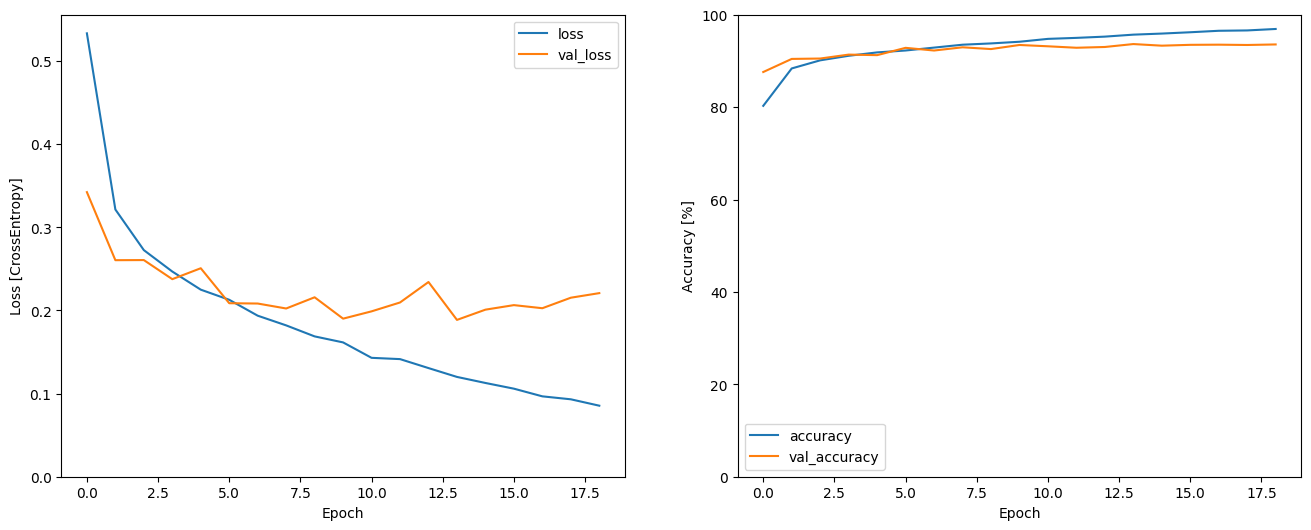

In [154]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [155]:
score = model.evaluate(test_images, test_labels, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 3s - loss: 0.2440 - accuracy: 0.9304 - 3s/epoch - 11ms/step
Test loss: 0.24395793676376343
Test accuracy: 0.930400013923645


In [156]:
pred = model.predict(test_images)
print(pred[1]) #Prediction for image 1
pred_1 = np.argmax(pred[1])
print(labels[pred_1], pred_1)
print(labels[test_labels_untouched[1]])

313/313 [==============================] - 3s 8ms/step
[8.5707185e-08 1.8464830e-12 9.9999440e-01 2.0611293e-10 2.3665384e-06
 5.6573364e-17 3.1256275e-06 1.7218058e-18 7.2208949e-14 1.3588752e-16]
Pullover 2
Pullover


In [157]:
counter = 0
for i in range(0,10000):
    pred_i = np.argmax(pred[i]) # get the position of the highest value within the list
    if test_labels_untouched[i] != pred_i: 
        counter += 1
print("Fails: ", counter)

Fails:  696


5
Sandalen


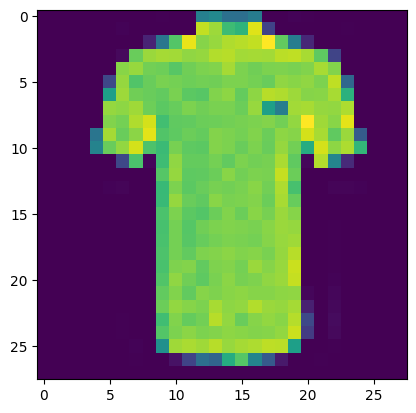

In [104]:
zahl = 1200   
print(test_labels_untouched[zahl])
print(labels[test_labels_untouched[zahl]])

plt.imshow(train_images[zahl])
plt.show()

In [139]:
y_pred = model.predict(test_images)
y_pred = tf.argmax(y_pred, axis=1)

313/313 [==============================] - 3s 8ms/step


In [ ]:
confusion_mtx = tf.math.confusion_matrix(test_labels_untouched, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [ ]:
model.save('./data/save/model.mdl')
model.save_weights("./data/save/model.h5")

In [109]:
# full path, not sure why
model = keras.models.load_model('/Users/s8gre/Documents/Schule/KerasProjects/ClothesRecognition/AI/data/save/model.mdl')
model.load_weights("/Users/s8gre/Documents/Schule/KerasProjects/ClothesRecognition/AI/data/save/model.h5")